In [147]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [148]:
sampling_freq = 50  # Hz
sampling_interval = 1.0 / sampling_freq  # second
cmap = 'cividis'
base_frequencies = [1.0, 2.0, 4.0, 8.0]

In [149]:
data_num = 2000
time_array = np.linspace(0.0, sampling_interval*data_num, data_num)

input_data = np.sin(2.0 * np.pi * time_array)
input_data[int(0.00*data_num):int(0.25*data_num)] = np.sin(2.0 * base_frequencies[0] * np.pi * time_array[int(0.00*data_num):int(0.25*data_num)])
input_data[int(0.25*data_num):int(0.50*data_num)] = np.sin(2.0 * base_frequencies[1] * np.pi * time_array[int(0.25*data_num):int(0.50*data_num)])
input_data[int(0.50*data_num):int(0.75*data_num)] = np.sin(2.0 * base_frequencies[2] * np.pi * time_array[int(0.50*data_num):int(0.75*data_num)])
input_data[int(0.75*data_num):int(1.00*data_num)] = np.sin(2.0 * base_frequencies[3] * np.pi * time_array[int(0.75*data_num):int(1.00*data_num)])
input_data = input_data * time_array

In [150]:
scale_list_linear = np.arange(1, 100)
coefl, freqsl = pywt.cwt(input_data, scale_list_linear, wavelet='gaus1', sampling_period=sampling_interval)

Text(0,0.5,'signal')

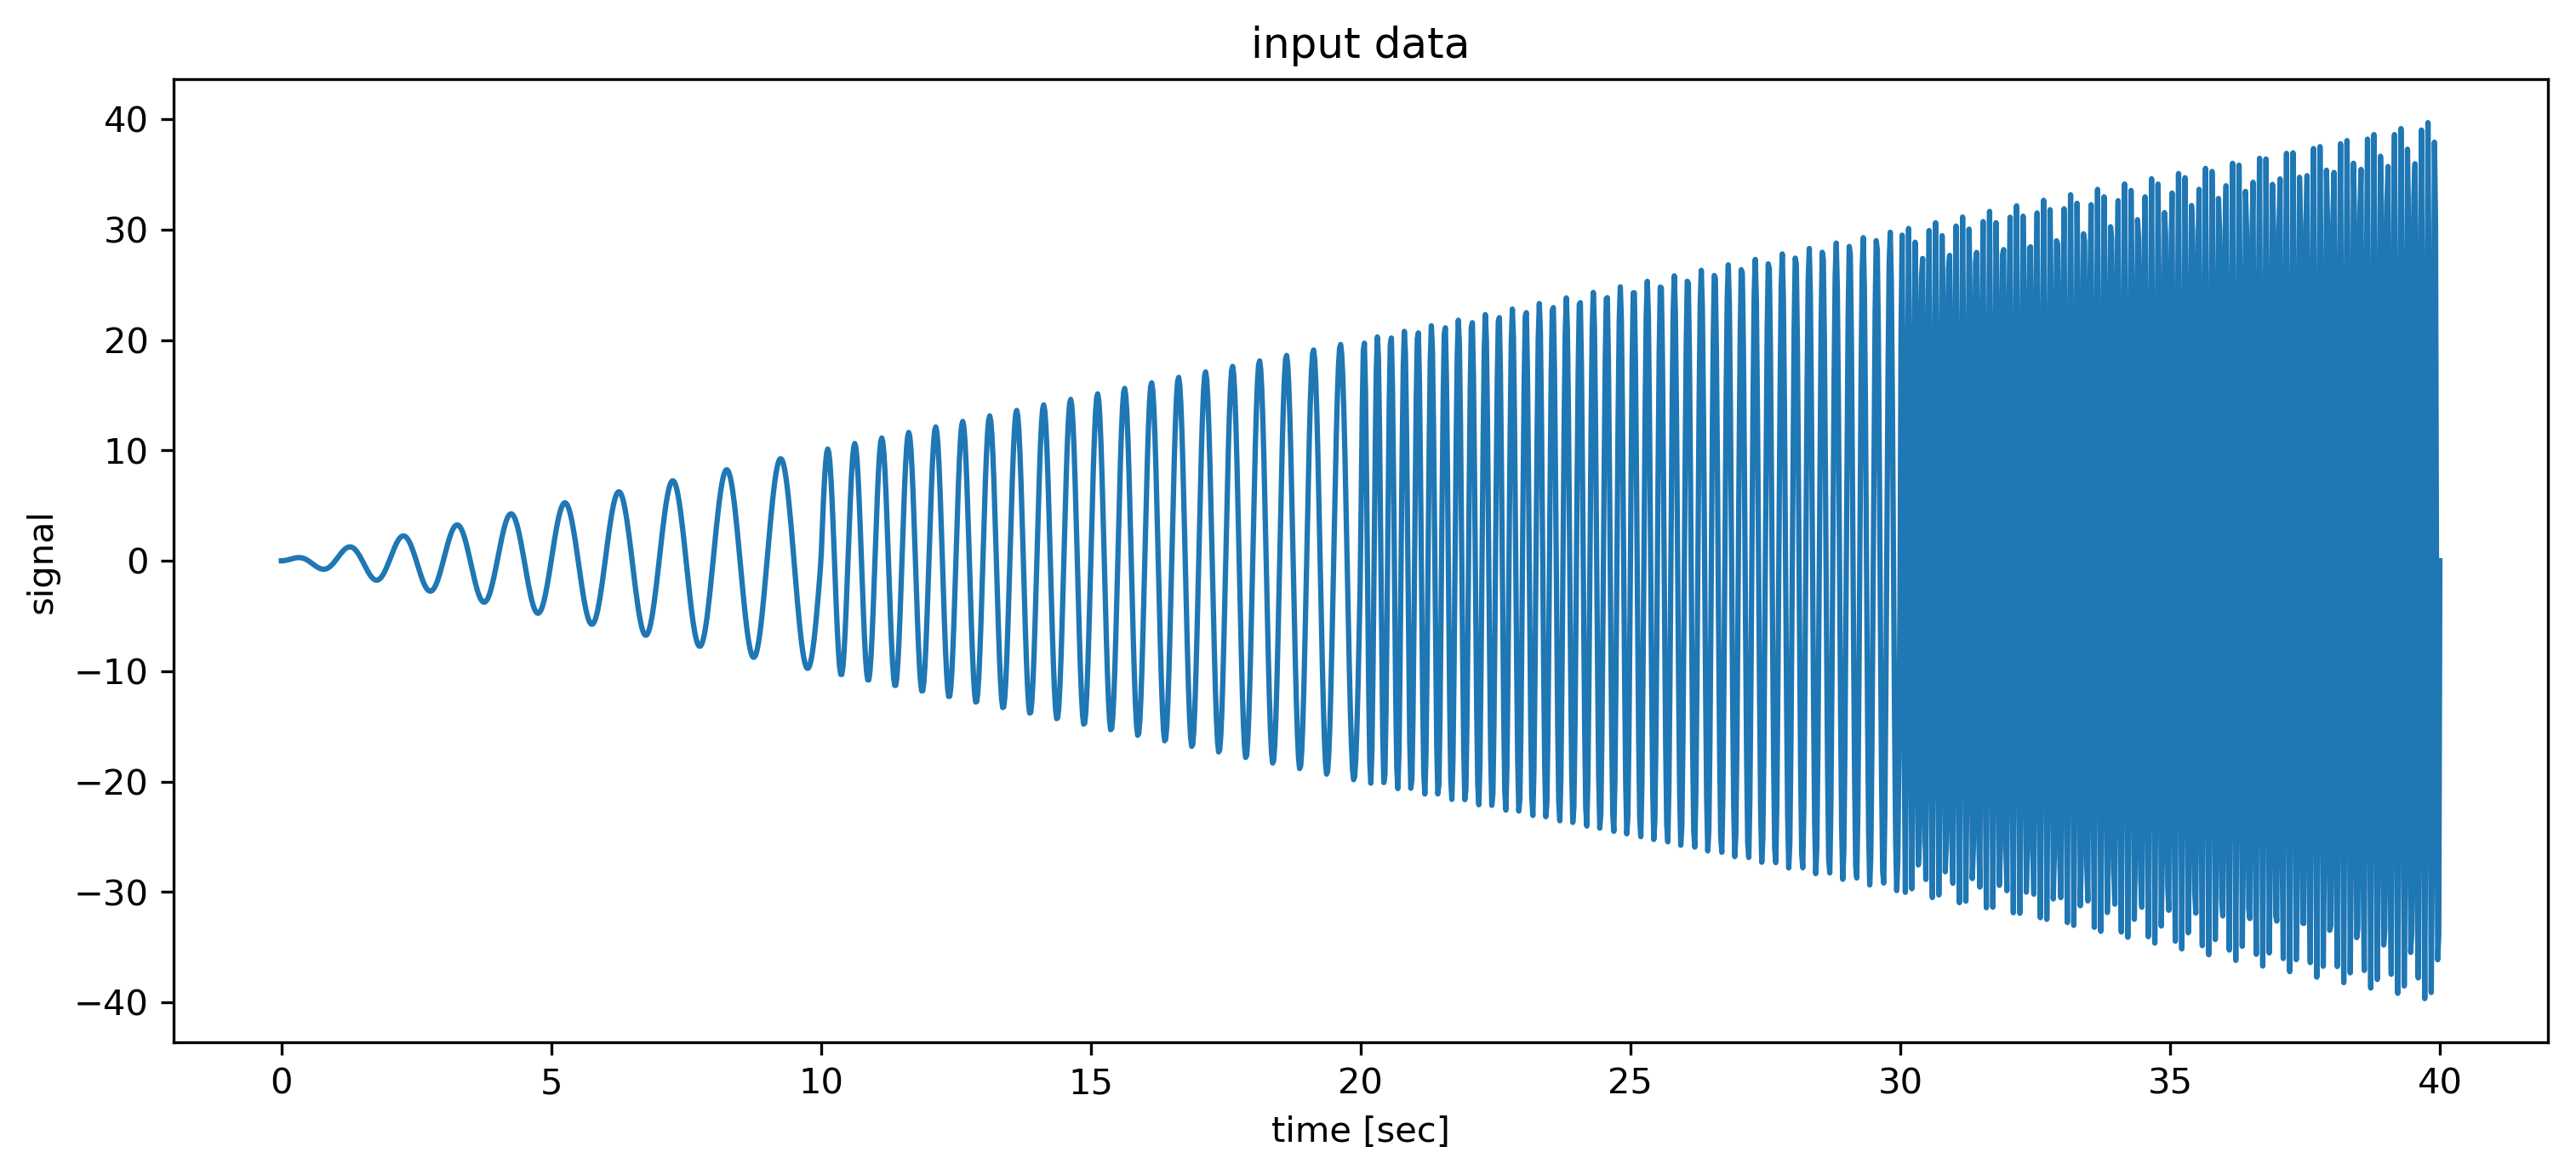

In [151]:
fig = plt.figure(figsize=(12,5), dpi=300)
ax1 = fig.add_subplot(111)
ax1.set_title('input data')
ax1.plot(time_array, input_data)
ax1.set_xlabel('time [sec]')
ax1.set_ylabel('signal')

In [152]:
xx, yy = np.meshgrid(time_array, freqsl)

Text(0,0.5,'frequency [Hz]')

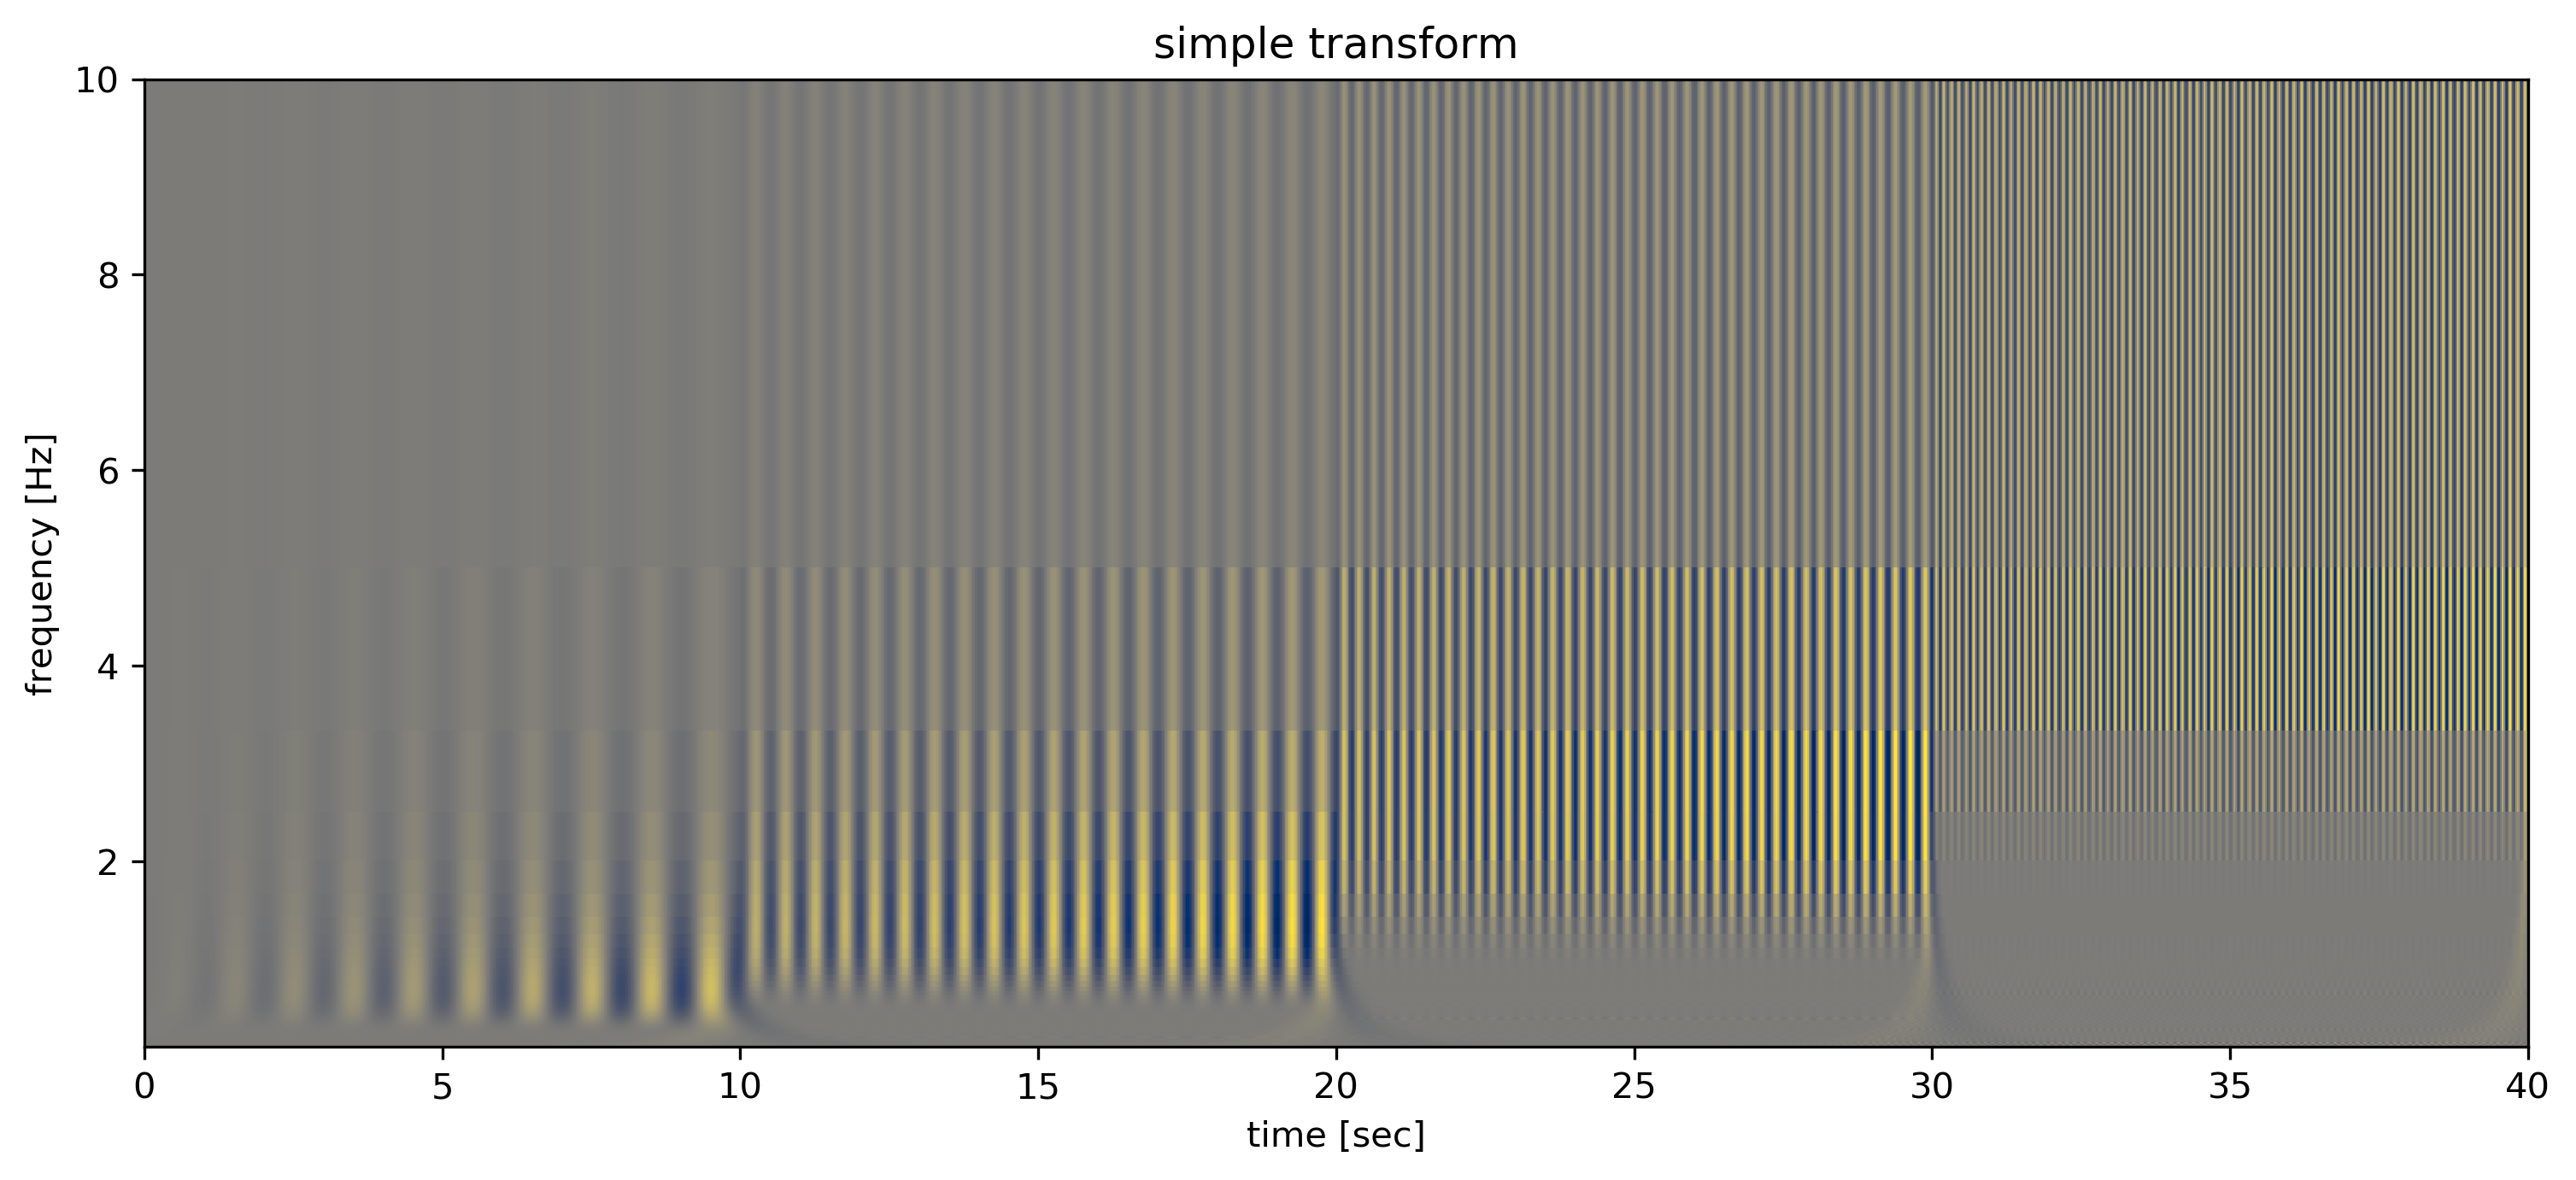

In [153]:
fig = plt.figure(figsize=(12,5), dpi=300)
ax1 = fig.add_subplot(111)
ax1.set_title("simple transform")
ax1.pcolormesh(xx, yy, coefl, shading='nearest', cmap=cmap)
ax1.set_xlabel('time [sec]')
ax1.set_ylabel('frequency [Hz]')

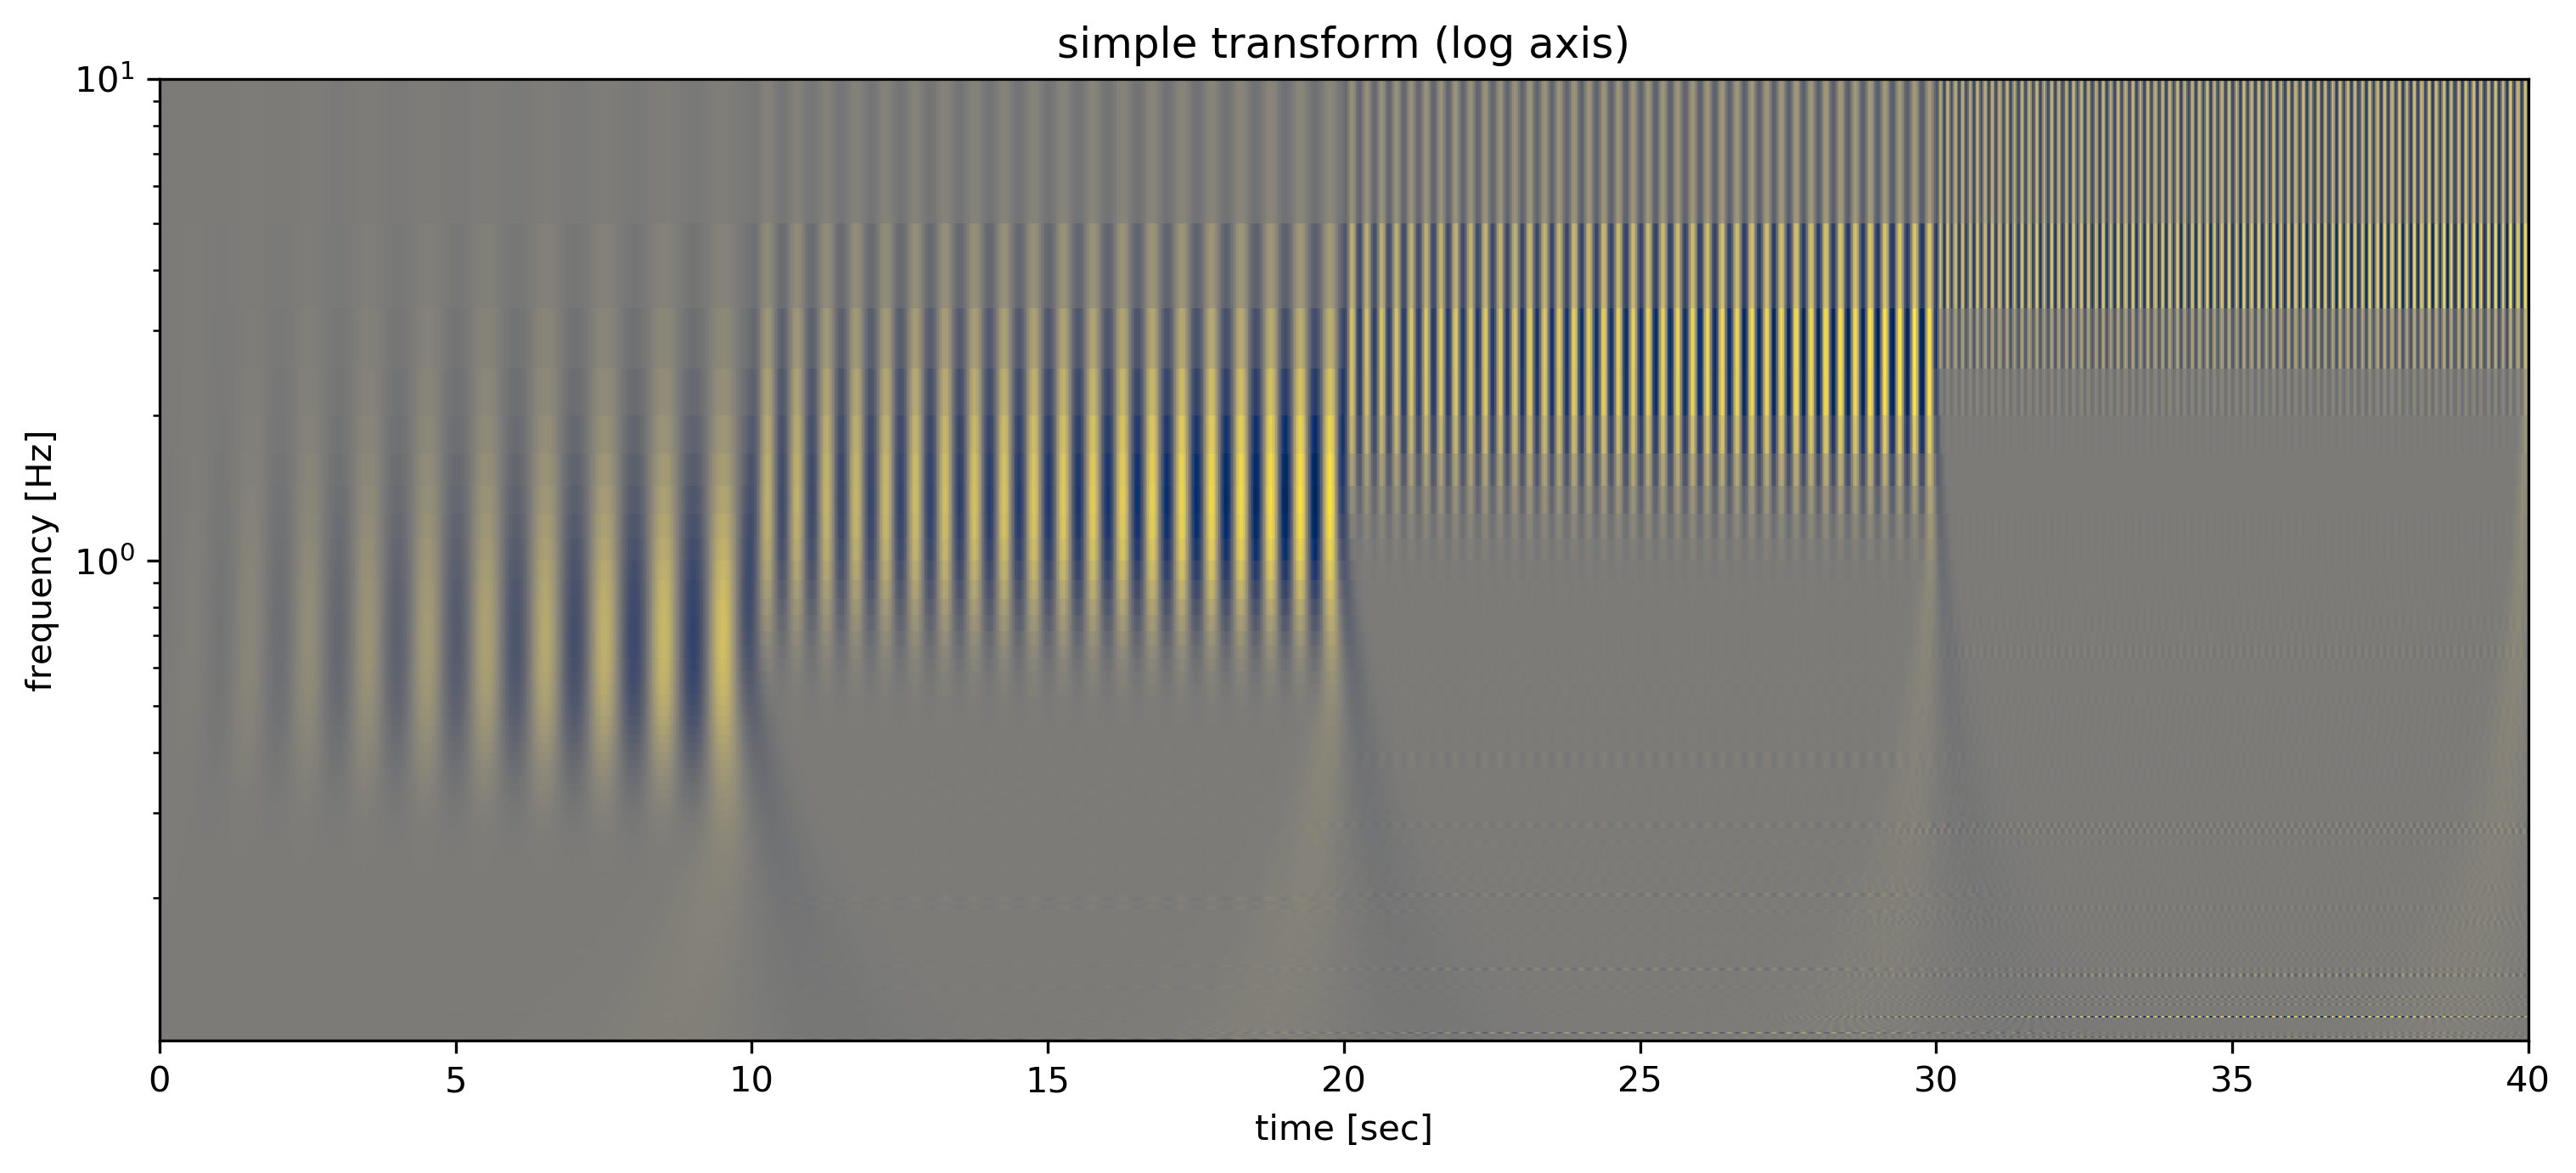

In [154]:
fig = plt.figure(figsize=(12,5), dpi=300)
ax1 = fig.add_subplot(111)
ax1.set_title("simple transform (log axis)")
ax1.pcolormesh(xx, yy, coefl, shading='nearest', cmap=cmap)
ax1.set_xlabel('time [sec]')
ax1.set_ylabel('frequency [Hz]')
ax1.set_yscale('log')

In [155]:
coefl_abs = np.abs(coefl)

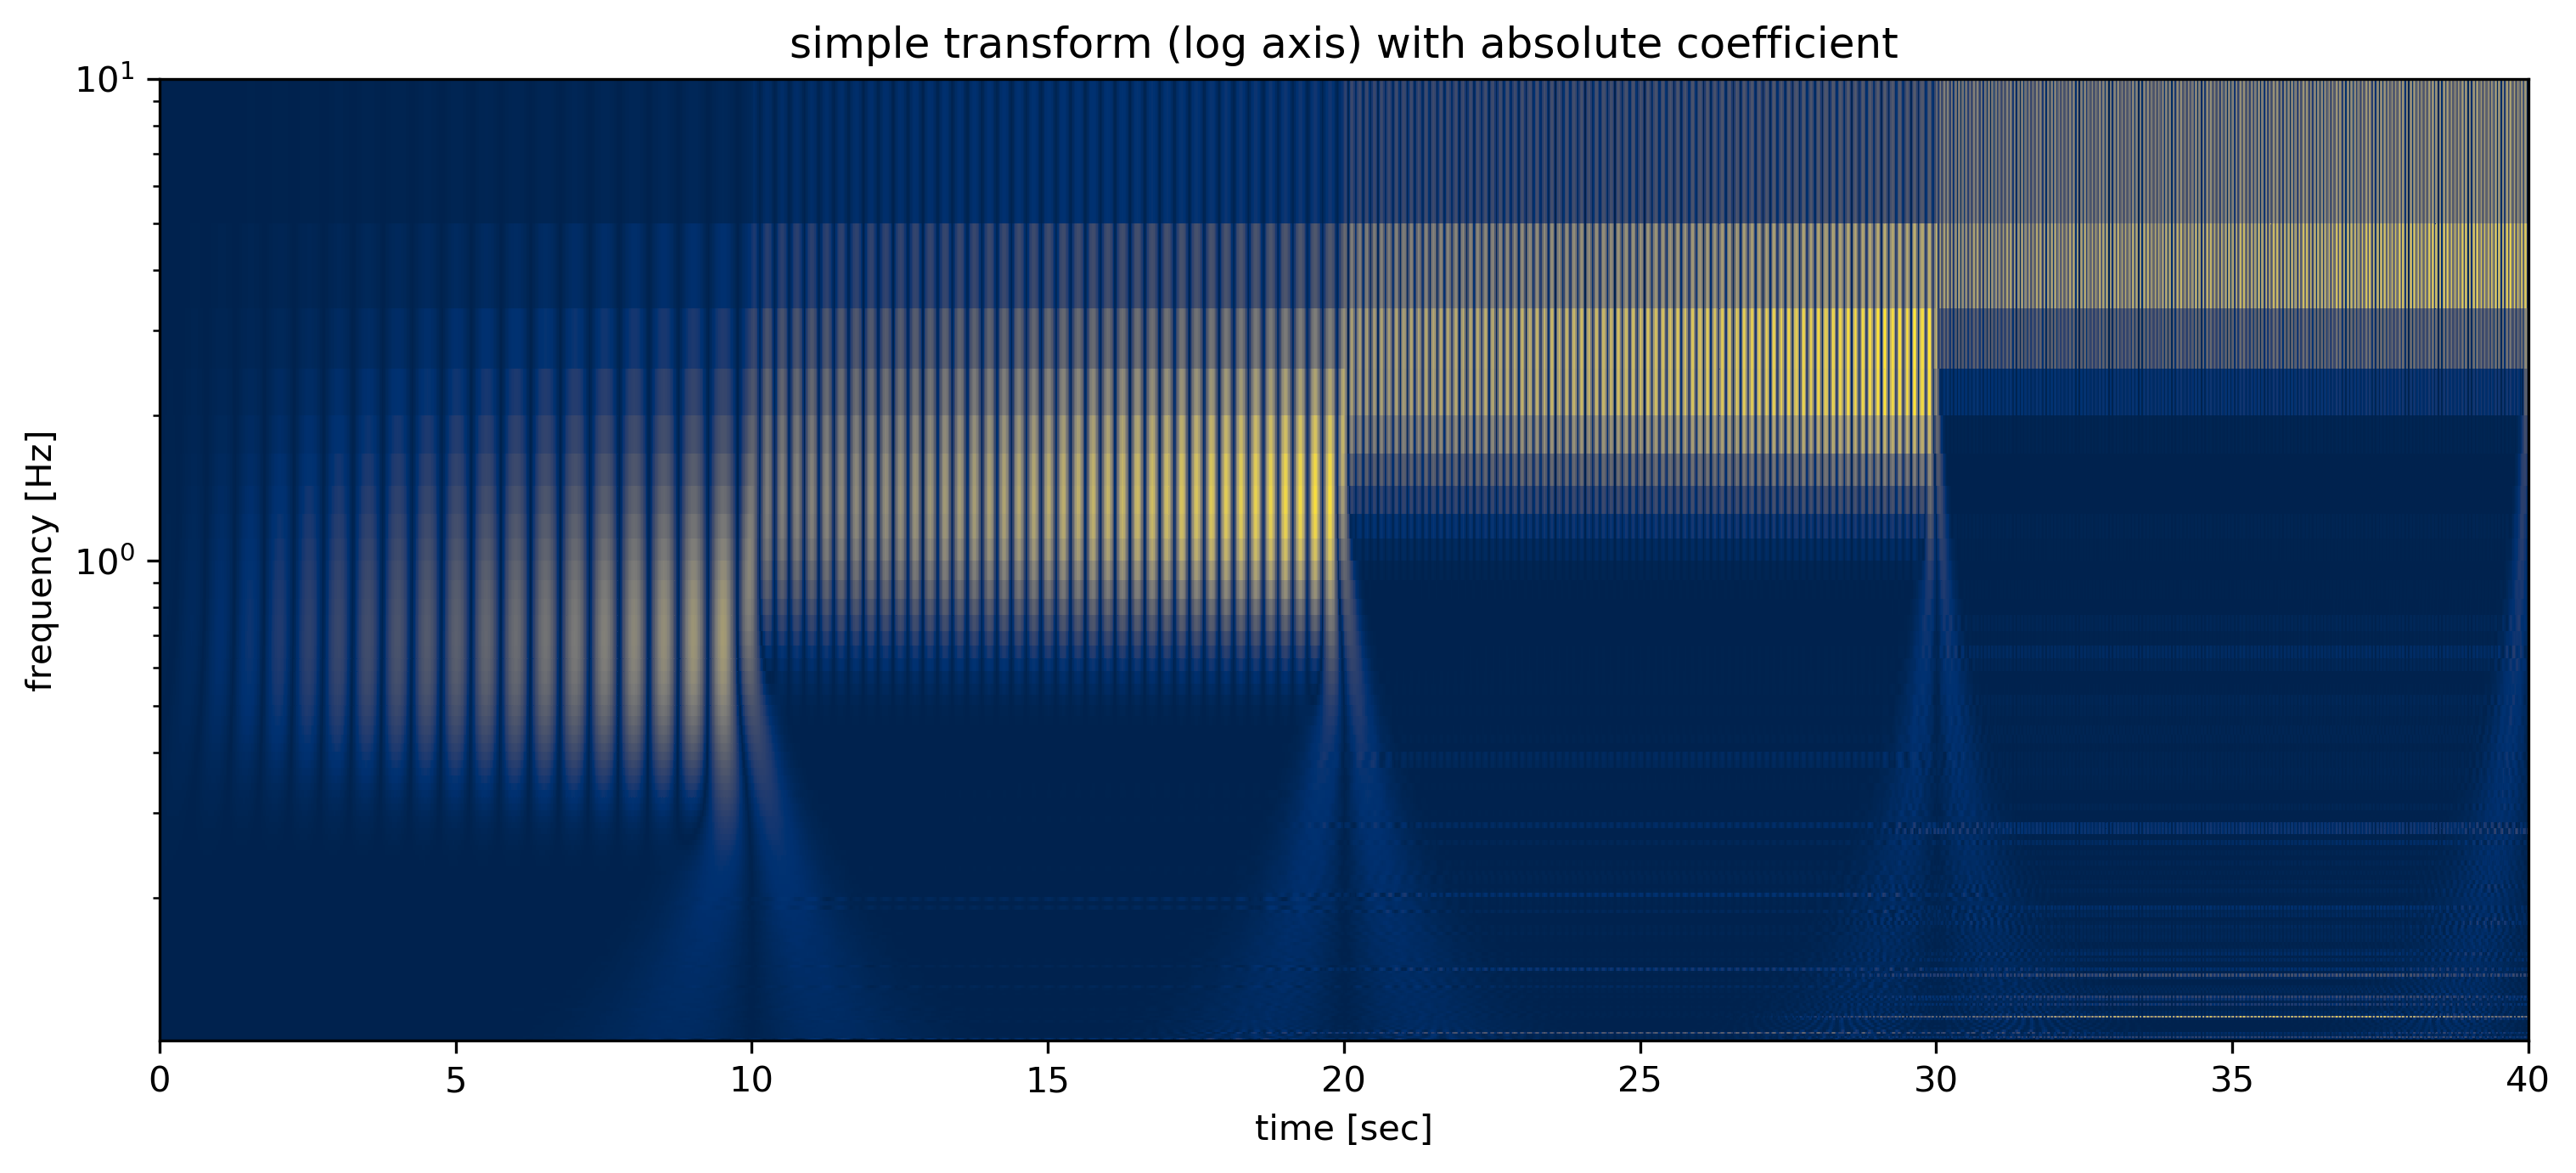

In [156]:
fig = plt.figure(figsize=(12,5), dpi=300)
ax1 = fig.add_subplot(111)
ax1.set_title("simple transform (log axis) with absolute coefficient")
ax1.pcolormesh(xx, yy, coefl_abs, shading='nearest', cmap=cmap)
ax1.set_xlabel('time [sec]')
ax1.set_ylabel('frequency [Hz]')
ax1.set_yscale('log')

In [157]:
scale_list_log = np.power(2.0, np.arange(-2, 9, 0.05))
coefg, freqsg = pywt.cwt(input_data, scale_list_log, wavelet='gaus1', sampling_period=sampling_interval)
coefg_abs = np.abs(coefg)
xg, yg = np.meshgrid(time_array, freqsg)

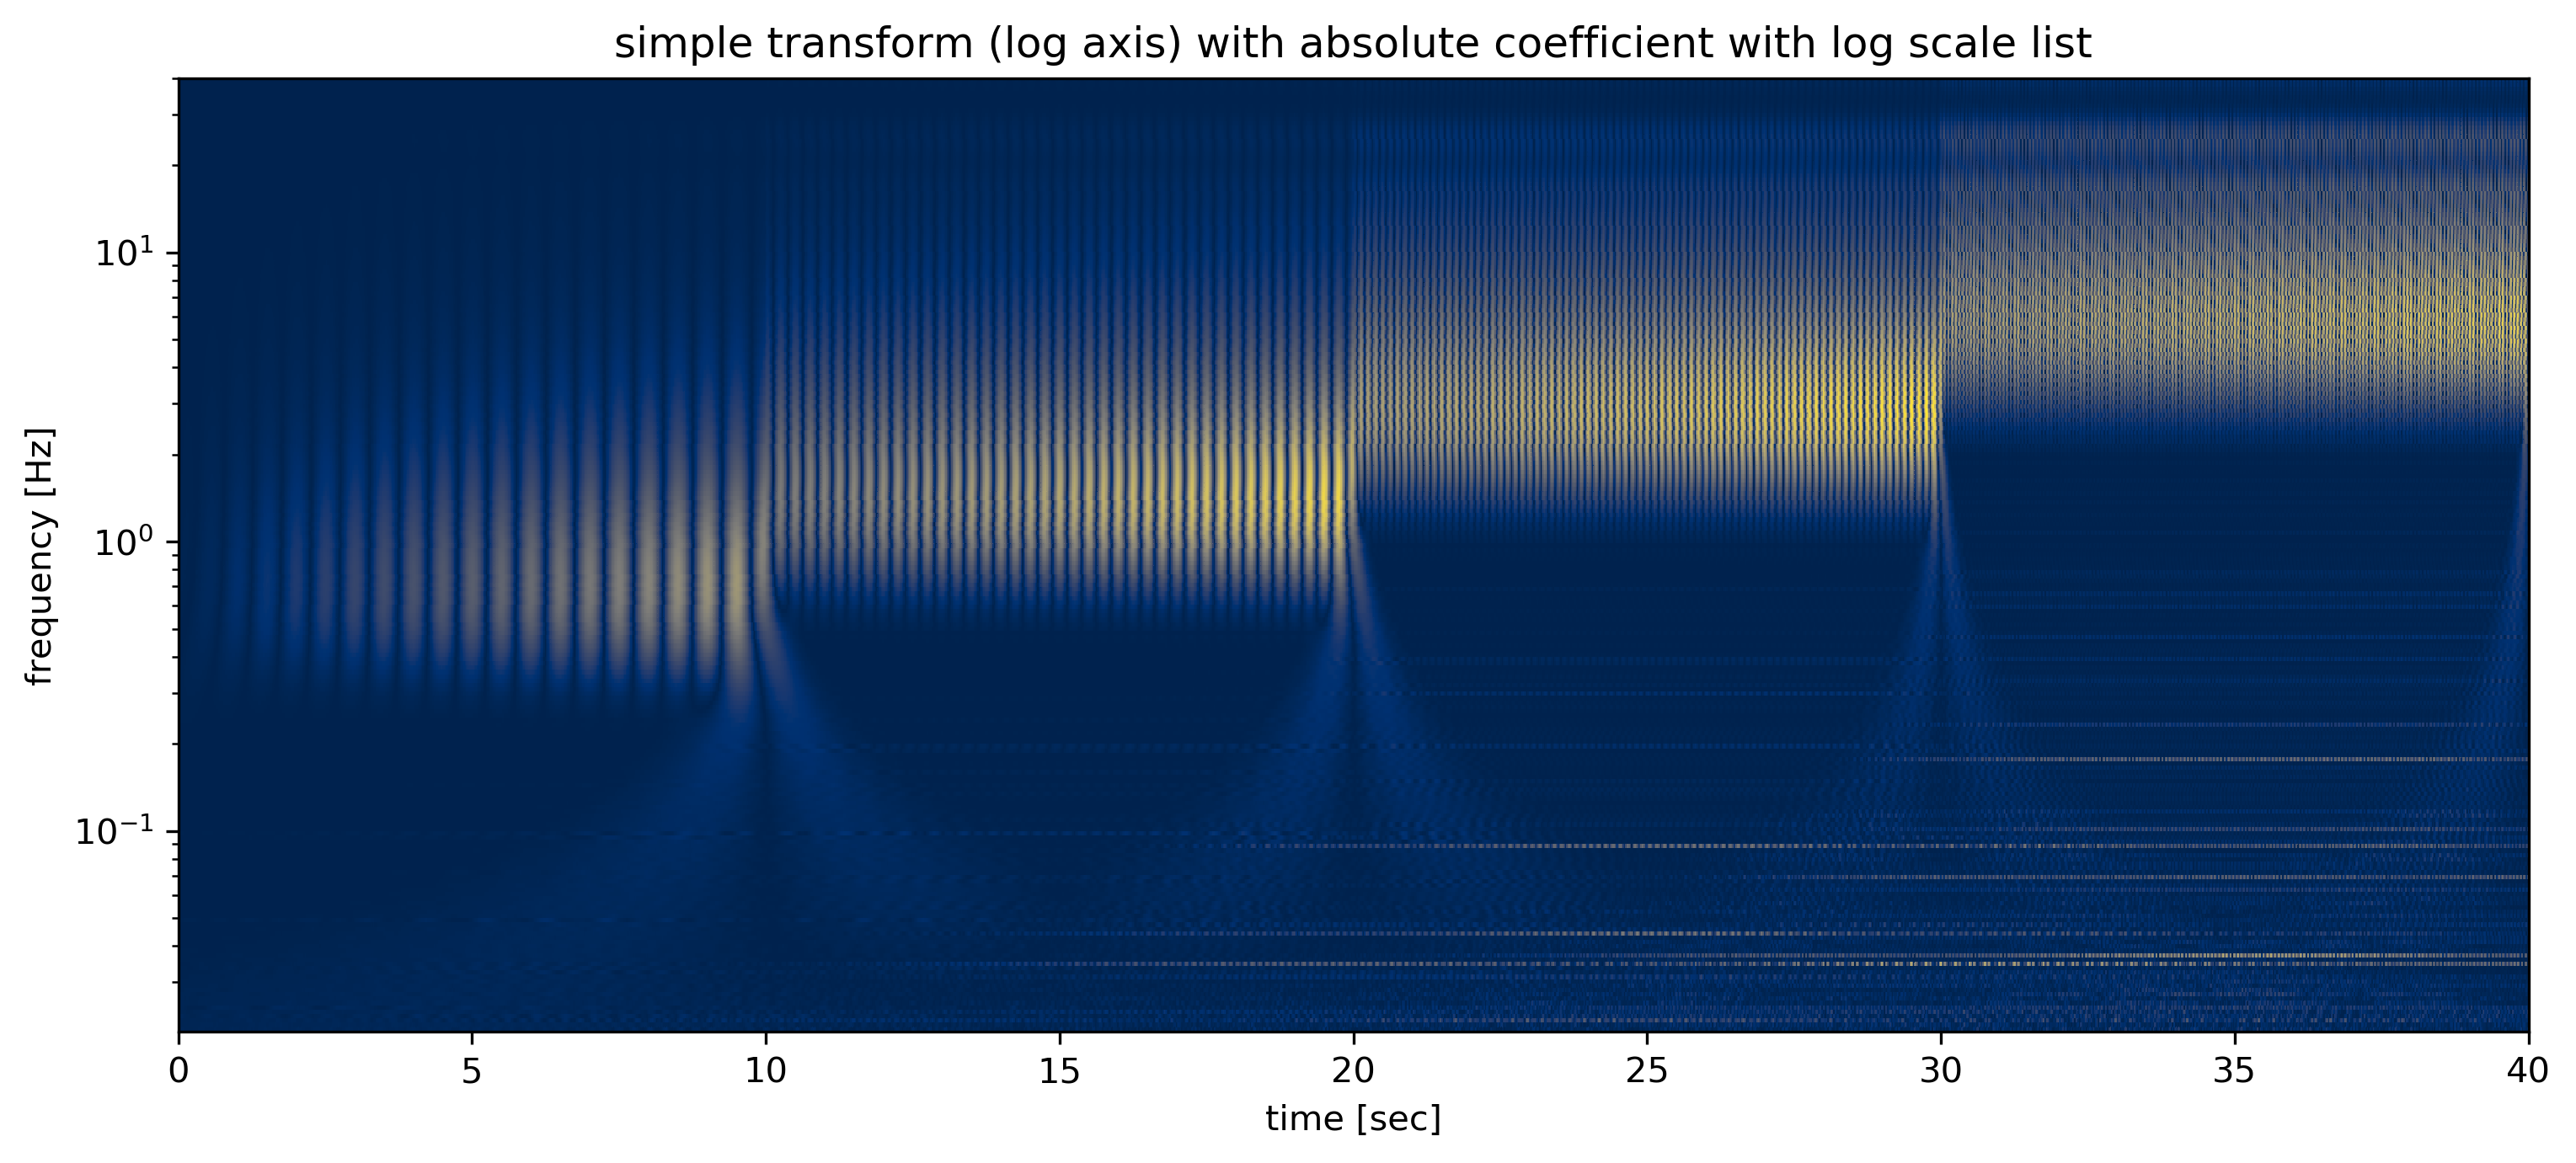

In [158]:
fig = plt.figure(figsize=(12,5), dpi=300)
ax1 = fig.add_subplot(111)
ax1.set_title("simple transform (log axis) with absolute coefficient with log scale list")
ax1.pcolormesh(xg, yg, coefg_abs, shading='nearest', cmap=cmap)
ax1.set_xlabel('time [sec]')
ax1.set_ylabel('frequency [Hz]')
ax1.set_yscale('log')

In [159]:
scaled_coefg = coefg
for i, scale in enumerate(scale_list_log):
    scaled_coefg[i, :] = coefg_abs[i, :] / np.sqrt(scale)

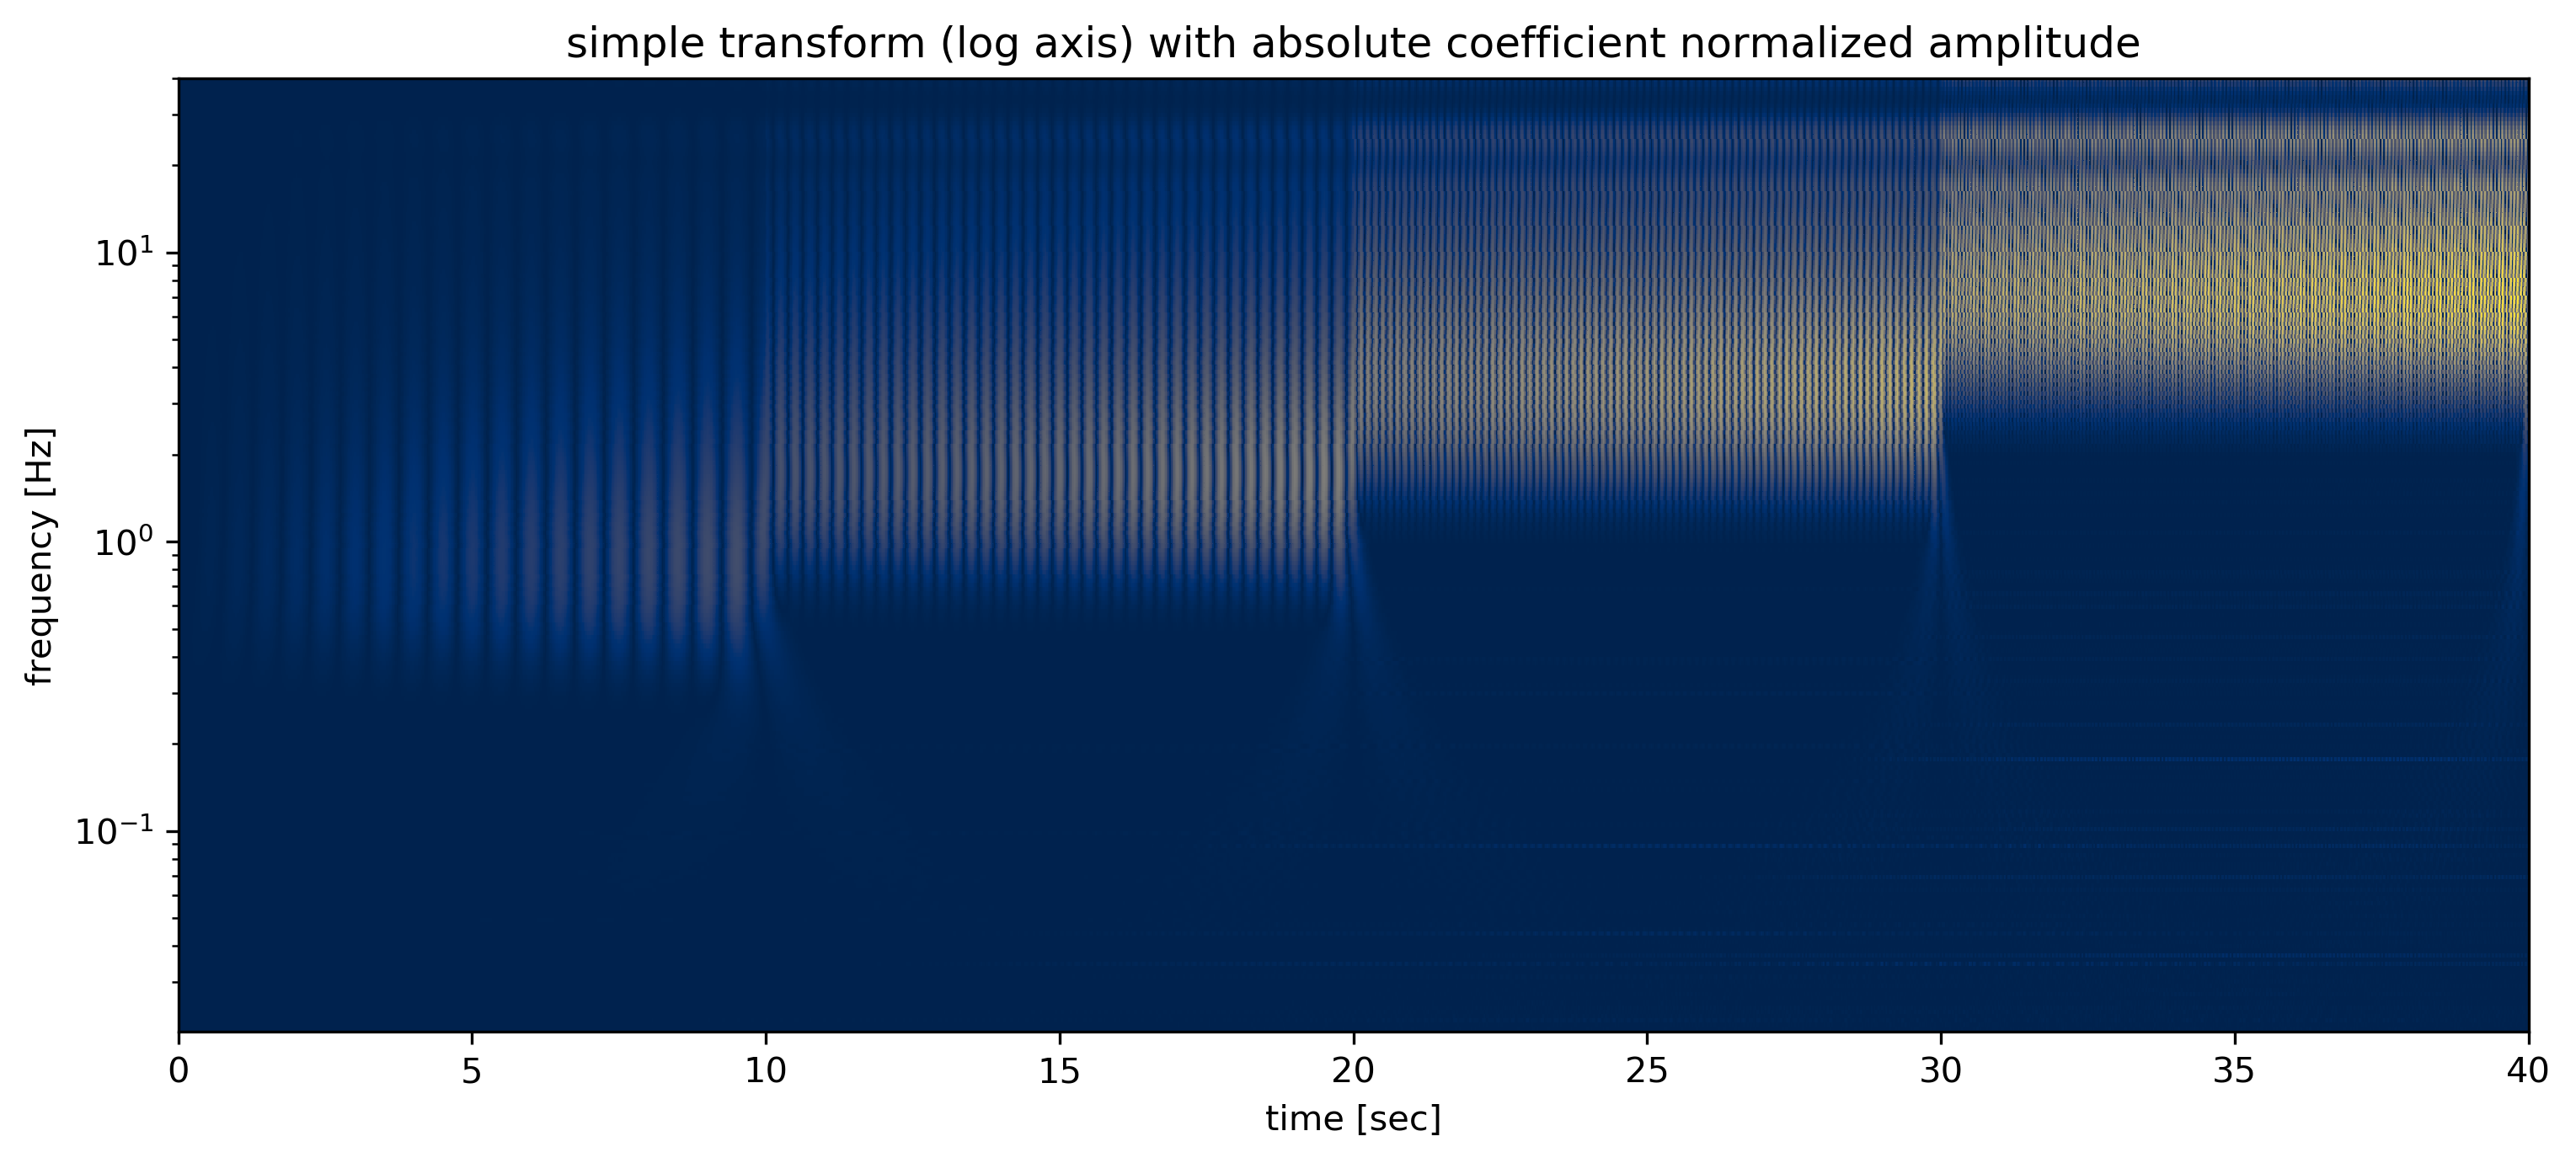

In [160]:
fig = plt.figure(figsize=(12,5), dpi=300)
ax1 = fig.add_subplot(111)
ax1.set_title("simple transform (log axis) with absolute coefficient normalized amplitude")
ax1.pcolormesh(xg, yg, scaled_coefg, shading='nearest', cmap=cmap)
ax1.set_xlabel('time [sec]')
ax1.set_ylabel('frequency [Hz]')
ax1.set_yscale('log')